# Test Recommender

In [3]:
from ..recommender import HybridRecommender

def test_recommendation_scenarios(recommender, movies_df, ratings_df, tags_df):
    """Test recommender system with different rating scenarios"""
    
    def print_recommendations(recs, ratings_df, tags_df, scenario_name=""):
        print(f"\n=== {scenario_name} ===\n")
        print("Top Recommended Movies:")
        print("-" * 80)
        print()
        
        for idx, row in recs.iterrows():
            movie_id = row['movieId']
            
            # Get ratings info
            movie_ratings = ratings_df[ratings_df['movieId'] == movie_id]
            avg_rating = movie_ratings['rating'].mean() if not movie_ratings.empty else "No ratings"
            num_ratings = len(movie_ratings) if not movie_ratings.empty else 0
            
            # Get tags
            movie_tags = tags_df[tags_df['movieId'] == movie_id]['tag'].value_counts()
            
            print(f"{movie_id}. {row['title']}")
            print(f"   Similarity Score: {row['similarity_score']:.3f}")
            print(f"   Genres: {row['genres']}")
            if isinstance(avg_rating, float):
                print(f"   Average Rating: {avg_rating:.2f} from {num_ratings} ratings")
            else:
                print(f"   Average Rating: {avg_rating}")
            
            if not movie_tags.empty:
                tags_str = ', '.join(movie_tags.index[:3])  # Show top 3 tags
                print(f"   Tags: {tags_str}")
            print()

    # Scenario 1: Progressive superhero movie ratings
    print("\nTesting progressive superhero ratings scenario...")
    
    # First rating: The Dark Knight
    ratings_1 = {58559: 5.0}  # The Dark Knight
    recs = recommender.get_recommendations(ratings_1, n_recommendations=5)
    print_recommendations(recs, ratings_df, tags_df, "First Rating: The Dark Knight")
    
    # Second rating: Add Inception
    ratings_2 = {
        58559: 5.0,  # The Dark Knight
        79132: 5.0   # Inception
    }
    recs = recommender.get_recommendations(ratings_2, n_recommendations=5)
    print_recommendations(recs, ratings_df, tags_df, "Second Rating: Inception")
    
    # Third rating: Add Batman Begins
    ratings_3 = {
        58559: 5.0,  # The Dark Knight
        79132: 5.0,  # Inception
        45722: 5.0   # Batman Begins
    }
    recs = recommender.get_recommendations(ratings_3, n_recommendations=5)
    print_recommendations(recs, ratings_df, tags_df, "Third Rating: Batman Begins")
    
    print("\n=== Evolution Analysis ===")
    print("Let's see how recommendations evolved:")
    
    # Test different scenarios
    print("\nTesting with different rating scenarios:")
    
    # Scenario 2: Mixed genre preferences
    mixed_ratings = {
        58559: 5.0,  # The Dark Knight (Action/Crime)
        79132: 5.0,  # Inception (Sci-Fi/Action)
        2959: 5.0,   # Fight Club (Drama)
        1197: 5.0,   # Princess Bride (Adventure/Fantasy)
        593: 5.0     # Silence of the Lambs (Crime/Drama/Thriller)
    }
    recs = recommender.get_recommendations(mixed_ratings, n_recommendations=5)
    print_recommendations(recs, ratings_df, tags_df, "Scenario 1: Mixed genre preferences")
    
    # Scenario 3: Consistent genre preference
    action_ratings = {
        58559: 5.0,  # The Dark Knight
        79132: 5.0,  # Inception
        45722: 5.0,  # Batman Begins
        91529: 5.0,  # The Dark Knight Rises
        7153: 5.0    # Iron Man
    }
    recs = recommender.get_recommendations(action_ratings, n_recommendations=5)
    print_recommendations(recs, ratings_df, tags_df, "Scenario 2: Consistent genre preference (Action)")

def main():
    # Load data
    print("Loading movie data...")
    movies_df = pd.read_csv("data/movies.csv")
    ratings_df = pd.read_csv("data/ratings.csv")
    tags_df = pd.read_csv("data/tags.csv")
    
    # Initialize recommender
    print("\nInitializing recommender system...")
    recommender = ImprovedHybridRecommender(use_gpu=True)
    recommender.fit(movies_df, ratings_df, tags_df)
    
    # Run test scenarios
    test_recommendation_scenarios(recommender, movies_df, ratings_df, tags_df)

if __name__ == "__main__":
    main()

Loading movie data...

Initializing recommender system...

=== System Configuration ===
CUDA Available: True
GPU Device: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA Version: 12.1
Successfully initialized GPU mode

Using device: cuda:0

Initializing BERT model...
BERT model loaded on GPU
Recommender system initialized successfully on cuda
Initializing recommender system...
Preprocessing data...
Computing BERT embeddings...
Generating new BERT embeddings on GPU...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 609/609 [00:15<00:00, 39.13it/s]


Computing TF-IDF embeddings...
Computing similarity matrix...
Computing popularity scores...
Initializing NCF model on cuda...

Initializing NCF model with 610 base users (+100 buffer) and 9742 items
Creating new NCF model...
Training initial model...

Training NCF model on cuda...
Epoch 2/10, Loss: 0.0274
Epoch 4/10, Loss: 0.0084
Epoch 6/10, Loss: 0.0051
Epoch 8/10, Loss: 0.0039
Epoch 10/10, Loss: 0.0032
NCF model ready!
Recommender system is ready!

Testing progressive superhero ratings scenario...

=== First Rating: The Dark Knight ===

Top Recommended Movies:
--------------------------------------------------------------------------------

91529. Dark Knight Rises, The (2012)
   Similarity Score: 0.952
   Genres: Action Adventure Crime IMAX
   Average Rating: 3.99 from 76 ratings
   Tags: Anne Hathaway, Christian Bale, Christopher Nolan

6214. Irreversible (Irréversible) (2002)
   Similarity Score: 0.940
   Genres: Crime Drama Mystery Thriller
   Average Rating: 3.89 from 9 ratings

# Recommender Evaluator


=== Loading Data ===
Loaded 9742 movies
Loaded 100836 ratings
Loaded 3683 tags

=== Initializing Recommender ===

=== System Configuration ===
CUDA Available: True
GPU Device: NVIDIA GeForce RTX 4070 Laptop GPU
CUDA Version: 12.1
Successfully initialized GPU mode

Using device: cuda:0

Initializing BERT model...
BERT model loaded on GPU
Recommender system initialized successfully on cuda

=== Preparing Evaluation ===

=== Training Recommender ===
Initializing recommender system...
Preprocessing data...
Computing BERT embeddings...
Using cached BERT embeddings
Computing TF-IDF embeddings...
Computing similarity matrix...
Computing popularity scores...
Initializing NCF model on cuda...

Initializing NCF model with 610 base users (+100 buffer) and 9742 items
Loading existing NCF model...
Loaded model with 610 users and 100 buffer slots
NCF model ready!
Recommender system is ready!

=== Running Evaluation ===

Evaluating accuracy metrics...


Evaluating users: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 116/116 [49:56<00:00, 25.83s/it]



Evaluating recommendation evolution...


Evaluating evolution: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [31:24<00:00, 18.85s/it]



=== Evaluation Results ===

Accuracy Metrics:
Precision      : 0.0250
Recall         : 0.0078
Ndcg           : 0.2606
F1_score       : 0.0106
Hit_rate       : 0.2143

Diversity Metrics:
Genre_diversity: 0.8036
Novelty        : 0.3214

Evolution Summary:
Final metrics after 20 ratings:
Precision      : 0.0080
Recall         : 0.0211
Ndcg           : 0.1334
Diversity      : 0.9411

=== Generating Visualizations ===


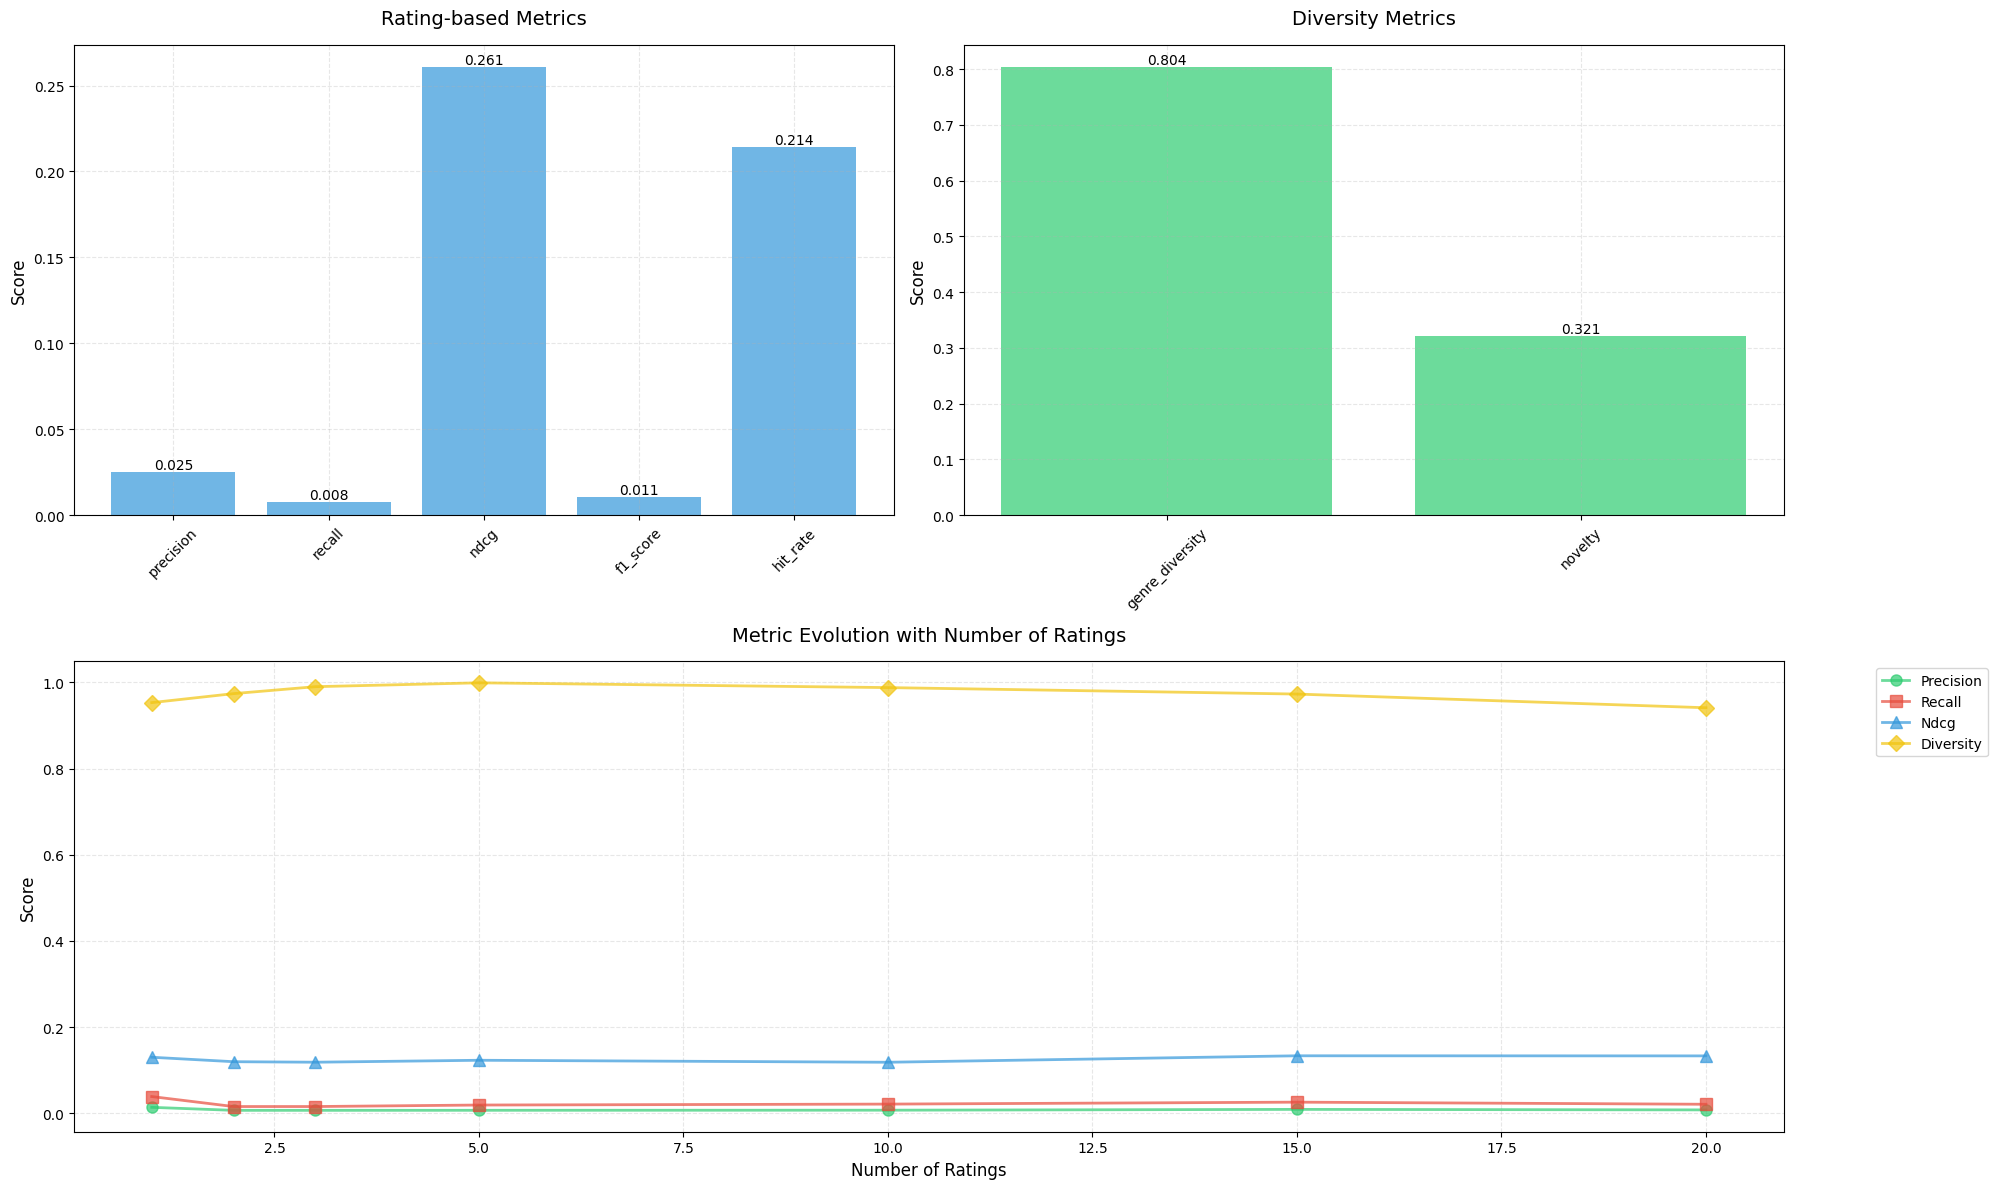


=== Saving Results ===

=== Evaluation Complete ===
Results saved to 'evaluation_results_standard.json'
Plots saved to 'evaluation_results_standard.png'


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, precision_score, recall_score, ndcg_score
from collections import defaultdict
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import traceback

class StandardEvaluator:
    def __init__(self, recommender, movies_df, ratings_df, tags_df):
        self.recommender = recommender
        self.movies_df = movies_df
        self.ratings_df = ratings_df
        self.tags_df = tags_df

    def evaluate_all(self, test_size=0.2, n_test_users=100):
        """Run evaluation"""
        results = {}
        
        # Basic Accuracy Metrics
        print("\nEvaluating accuracy metrics...")
        accuracy_metrics = self.evaluate_accuracy(test_size)
        results['accuracy'] = accuracy_metrics
        
        # Evolution Analysis
        print("\nEvaluating recommendation evolution...")
        evolution_metrics = self.evaluate_evolution(
            n_test_users,
            ratings_per_step=[1, 2, 3, 5, 10, 15, 20]
        )
        results['evolution'] = evolution_metrics
        
        return results

    def evaluate_accuracy(self, test_size=0.2, k=10):
        """Evaluate accuracy metrics"""
        # Split data chronologically
        sorted_ratings = self.ratings_df.sort_values('timestamp')
        split_idx = int(len(sorted_ratings) * (1 - test_size))
        test_ratings = sorted_ratings.iloc[split_idx:]
        
        metrics = {
            'rating_based': {
                'precision': [],
                'recall': [],
                'ndcg': [],
                'f1_score': [],
                'hit_rate': []
            },
            'diversity': {
                'genre_diversity': [],
                'novelty': []
            }
        }
        
        user_ratings = test_ratings.groupby('userId')
        
        for user_id, group in tqdm(user_ratings, desc="Evaluating users"):
            # Get training ratings
            train_ratings = {
                row['movieId']: row['rating']
                for _, row in self.ratings_df[
                    (self.ratings_df['userId'] == user_id) & 
                    (~self.ratings_df['movieId'].isin(group['movieId']))
                ].iterrows()
            }
            
            if not train_ratings:
                continue
            
            # Get recommendations
            recs = self.recommender.get_recommendations(train_ratings, k)
            if recs.empty:
                continue
            
            # Calculate rating-based metrics
            recommended_items = set(recs['movieId'])
            relevant_items = set(group[group['rating'] >= 4]['movieId'])
            
            hits = len(recommended_items & relevant_items)
            precision = hits / len(recommended_items) if recommended_items else 0
            recall = hits / len(relevant_items) if relevant_items else 0
            f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
            
            metrics['rating_based']['precision'].append(precision)
            metrics['rating_based']['recall'].append(recall)
            metrics['rating_based']['f1_score'].append(f1)
            metrics['rating_based']['hit_rate'].append(1.0 if hits > 0 else 0.0)
            
            # Calculate NDCG
            true_relevance = np.zeros(len(self.movies_df))
            pred_relevance = np.zeros(len(self.movies_df))
            
            for mid in relevant_items:
                if mid in self.recommender.movie_indices:
                    true_relevance[self.recommender.movie_indices[mid]] = 1
                    
            for _, row in recs.iterrows():
                if row['movieId'] in self.recommender.movie_indices:
                    pred_relevance[self.recommender.movie_indices[row['movieId']]] = 1
            
            ndcg = ndcg_score([true_relevance], [pred_relevance])
            metrics['rating_based']['ndcg'].append(ndcg)
            
            # Calculate diversity metrics
            genres = set()
            for _, row in recs.iterrows():
                genres.update(row['genres'].split('|'))
            genre_diversity = len(genres) / max(len(recommended_items), 1)
            metrics['diversity']['genre_diversity'].append(genre_diversity)
            
            popularity_scores = [
                self.recommender.movie_popularity.get(mid, 0)
                for mid in recommended_items
            ]
            novelty = 1 - (sum(popularity_scores) / len(popularity_scores)) if popularity_scores else 0
            metrics['diversity']['novelty'].append(novelty)
        
        return {
            category: {
                metric: float(np.mean(values)) 
                for metric, values in metrics[category].items()
                if values
            }
            for category in metrics
        }

    def evaluate_evolution(self, n_users=100, ratings_per_step=[1, 2, 3, 5, 10]):
        """Evaluate how recommendations evolve with more ratings"""
        evolution_metrics = defaultdict(lambda: defaultdict(list))
        test_users = np.random.choice(self.ratings_df['userId'].unique(), n_users)
        
        for user_id in tqdm(test_users, desc="Evaluating evolution"):
            user_ratings = self.ratings_df[
                self.ratings_df['userId'] == user_id
            ].sort_values('timestamp')
            
            for n_ratings in ratings_per_step:
                if len(user_ratings) < n_ratings + 5:
                    continue
                    
                train = user_ratings.iloc[:n_ratings]
                test = user_ratings.iloc[n_ratings:n_ratings+5]
                
                train_dict = dict(zip(train['movieId'], train['rating']))
                test_dict = dict(zip(test['movieId'], test['rating']))
                
                recs = self.recommender.get_recommendations(train_dict, 10)
                
                if not recs.empty:
                    recommended_items = set(recs['movieId'])
                    relevant_items = set(test[test['rating'] >= 4]['movieId'])
                    
                    hits = len(recommended_items & relevant_items)
                    precision = hits / len(recommended_items) if recommended_items else 0
                    recall = hits / len(relevant_items) if relevant_items else 0
                    
                    evolution_metrics[n_ratings]['precision'].append(precision)
                    evolution_metrics[n_ratings]['recall'].append(recall)
                    
                    # Calculate NDCG
                    true_relevance = np.zeros(len(self.movies_df))
                    pred_relevance = np.zeros(len(self.movies_df))
                    
                    for mid in relevant_items:
                        if mid in self.recommender.movie_indices:
                            true_relevance[self.recommender.movie_indices[mid]] = 1
                            
                    for _, row in recs.iterrows():
                        if row['movieId'] in self.recommender.movie_indices:
                            pred_relevance[self.recommender.movie_indices[row['movieId']]] = 1
                    
                    ndcg = ndcg_score([true_relevance], [pred_relevance])
                    evolution_metrics[n_ratings]['ndcg'].append(ndcg)
                    
                    # Calculate diversity
                    genres = set()
                    for _, row in recs.iterrows():
                        genres.update(row['genres'].split('|'))
                    diversity = len(genres) / len(recs)
                    evolution_metrics[n_ratings]['diversity'].append(diversity)
        
        return evolution_metrics

def plot_results(results, save_path=None):
    """Plot evaluation results with enhanced visualization"""
    plt.style.use('default')  # Use default matplotlib style
    
    # Set basic style parameters
    plt.rcParams['figure.figsize'] = (20, 12)
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.3
    plt.rcParams['axes.labelsize'] = 12
    plt.rcParams['axes.titlesize'] = 14
    plt.rcParams['xtick.labelsize'] = 10
    plt.rcParams['ytick.labelsize'] = 10
    
    fig = plt.figure(figsize=(20, 12))
    
    # Rating-based Metrics
    ax1 = plt.subplot(2, 2, 1)
    metrics = results['accuracy']['rating_based']
    bars = ax1.bar(list(metrics.keys()), list(metrics.values()), 
                   color='#3498db', alpha=0.7)
    ax1.set_title('Rating-based Metrics', fontsize=14, pad=15)
    ax1.set_ylabel('Score')
    plt.xticks(rotation=45)
    ax1.grid(True, linestyle='--', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    
    # Diversity Metrics
    ax2 = plt.subplot(2, 2, 2)
    metrics = results['accuracy']['diversity']
    bars = ax2.bar(list(metrics.keys()), list(metrics.values()), 
                   color='#2ecc71', alpha=0.7)
    ax2.set_title('Diversity Metrics', fontsize=14, pad=15)
    ax2.set_ylabel('Score')
    plt.xticks(rotation=45)
    ax2.grid(True, linestyle='--', alpha=0.3)
    
    # Add value labels
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom')
    
    # Evolution Plot
    ax3 = plt.subplot(2, 1, 2)
    evolution = results['evolution']
    x = sorted(evolution.keys())
    
    colors = ['#2ecc71', '#e74c3c', '#3498db', '#f1c40f']
    markers = ['o', 's', '^', 'D']
    
    for i, metric in enumerate(['precision', 'recall', 'ndcg', 'diversity']):
        y = [np.mean(evolution[k][metric]) for k in x]
        ax3.plot(x, y, marker=markers[i], linewidth=2, markersize=8,
                color=colors[i], label=metric.capitalize(),
                alpha=0.7)
    
    ax3.set_title('Metric Evolution with Number of Ratings', fontsize=14, pad=15)
    ax3.set_xlabel('Number of Ratings')
    ax3.set_ylabel('Score')
    ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax3.grid(True, linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    
    # Save plot with high quality
    if save_path:
        plt.savefig(save_path, bbox_inches='tight', dpi=300,
                   facecolor='white', edgecolor='none')
    
    plt.show()

def main():
    """Main function for standard evaluation"""
    try:
        # Load Data
        print("\n=== Loading Data ===")
        movies_df = pd.read_csv("data/movies.csv")
        ratings_df = pd.read_csv("data/ratings.csv")
        tags_df = pd.read_csv("data/tags.csv")
        
        print(f"Loaded {len(movies_df)} movies")
        print(f"Loaded {len(ratings_df)} ratings")
        print(f"Loaded {len(tags_df)} tags")
        
        # Initialize Recommender
        print("\n=== Initializing Recommender ===")
        recommender = ImprovedHybridRecommender(use_gpu=True)
        
        # Initialize Evaluator
        print("\n=== Preparing Evaluation ===")
        evaluator = StandardEvaluator(recommender, movies_df, ratings_df, tags_df)
        
        # Fit Recommender
        print("\n=== Training Recommender ===")
        recommender.fit(movies_df, ratings_df, tags_df)
        
        # Run Evaluation
        print("\n=== Running Evaluation ===")
        results = evaluator.evaluate_all(test_size=0.2, n_test_users=100)
        
        # Print Results
        print("\n=== Evaluation Results ===")
        print("\nAccuracy Metrics:")
        for metric, value in results['accuracy']['rating_based'].items():
            print(f"{metric.capitalize():15s}: {value:.4f}")
        
        print("\nDiversity Metrics:")
        for metric, value in results['accuracy']['diversity'].items():
            print(f"{metric.capitalize():15s}: {value:.4f}")
        
        print("\nEvolution Summary:")
        n_ratings = max(results['evolution'].keys())
        print(f"Final metrics after {n_ratings} ratings:")
        for metric in ['precision', 'recall', 'ndcg', 'diversity']:
            final_value = np.mean(results['evolution'][n_ratings][metric])
            print(f"{metric.capitalize():15s}: {final_value:.4f}")
        
        # Plot Results
        print("\n=== Generating Visualizations ===")
        plot_results(results, save_path="evaluation_results_standard.png")
        
        # Save Results
        print("\n=== Saving Results ===")
        results_summary = {
            'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S'),
            'accuracy_metrics': results['accuracy']['rating_based'],
            'diversity_metrics': results['accuracy']['diversity'],
            'evolution_final': {
                metric: np.mean(results['evolution'][n_ratings][metric])
                for metric in ['precision', 'recall', 'ndcg', 'diversity']
            }
        }
        
        with open('evaluation_results_standard.json', 'w') as f:
            json.dump(results_summary, f, indent=4)
            
        print("\n=== Evaluation Complete ===")
        print("Results saved to 'evaluation_results_standard.json'")
        print("Plots saved to 'evaluation_results_standard.png'")
        
    except Exception as e:
        print(f"\nError during evaluation: {str(e)}")
        traceback.print_exc()

if __name__ == "__main__":
    main()